# 1. Frame the problem and look at the big picture

The problem is to use a kaggle red wine dataset and create an algorithm which can classify wines into good and bad.

# 2. Get the data

Download the zip file from here and save it into the "datasets" subfolder.  The code will do the rest.

Location: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

filename: archive.zip

In [2]:
# red wine example
# https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

#download the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import os
import zipfile

# define path for data
zip_filename='archive.zip'
pwd=os.getcwd()
path=os.path.join(pwd,'datasets',zip_filename)

#extract zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(os.path.join(pwd,'datasets'))

path=os.path.join(pwd,'datasets','winequality-red.csv')


### Convert data to format you can easily manipulate

In [4]:
# read data into a pandas dataframe
data=pd.read_csv(path,sep=',')


# Explore the data

### Check size and type of data

In [5]:
# check size and type of data in each column
data.info()
print(" ")
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Visualize data

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

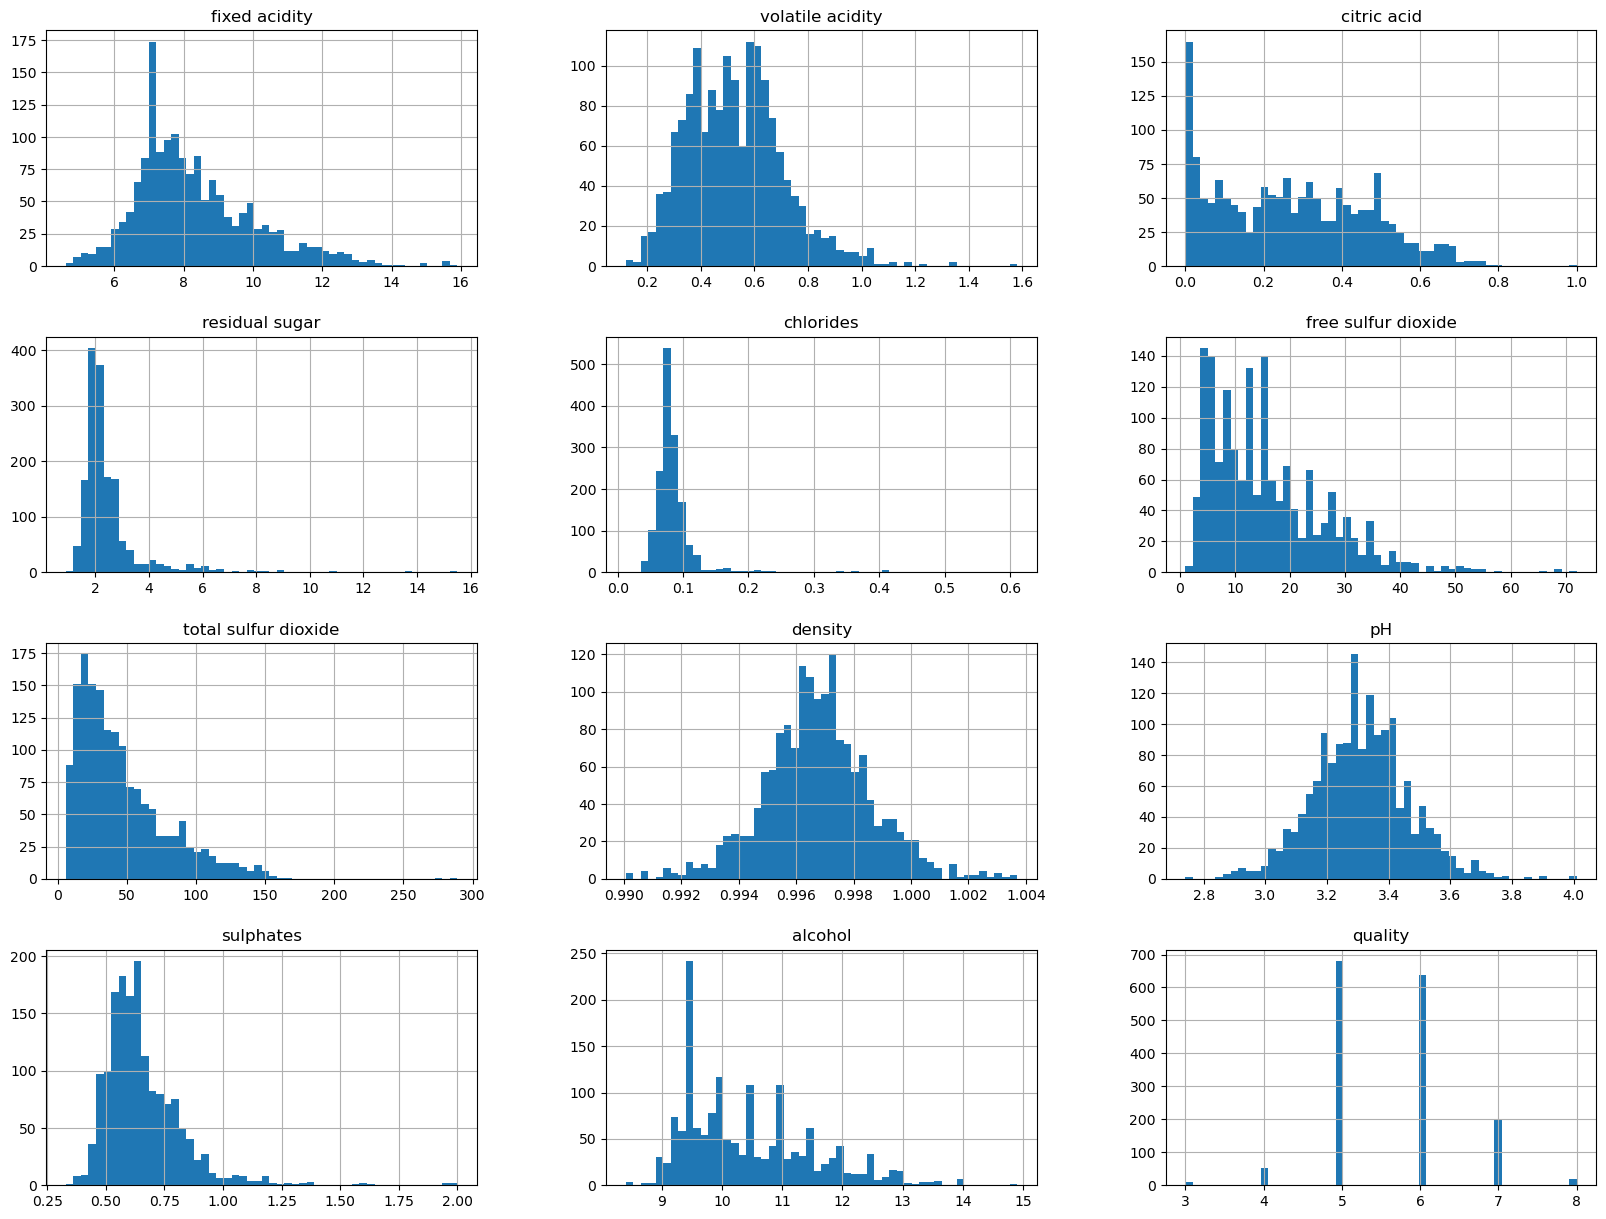

In [6]:
# create a histogram plot 

import matplotlib.pyplot as plt
data.hist(bins=52,figsize=(20,15))


### Sample a test set and put it aside

In [7]:
# create X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
target='quality'
y=data[target]
X=data.drop(target,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_categorical=pd.cut(y_train,bins=[0,4,6,10],labels=["Bad","Average","Great"]) # turn quality into categorical with three tiers  
y_train_binary=(y_train>5) # turn quality into binary

data_train=pd.concat([X_train,y_train],axis=1) # if needed



array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

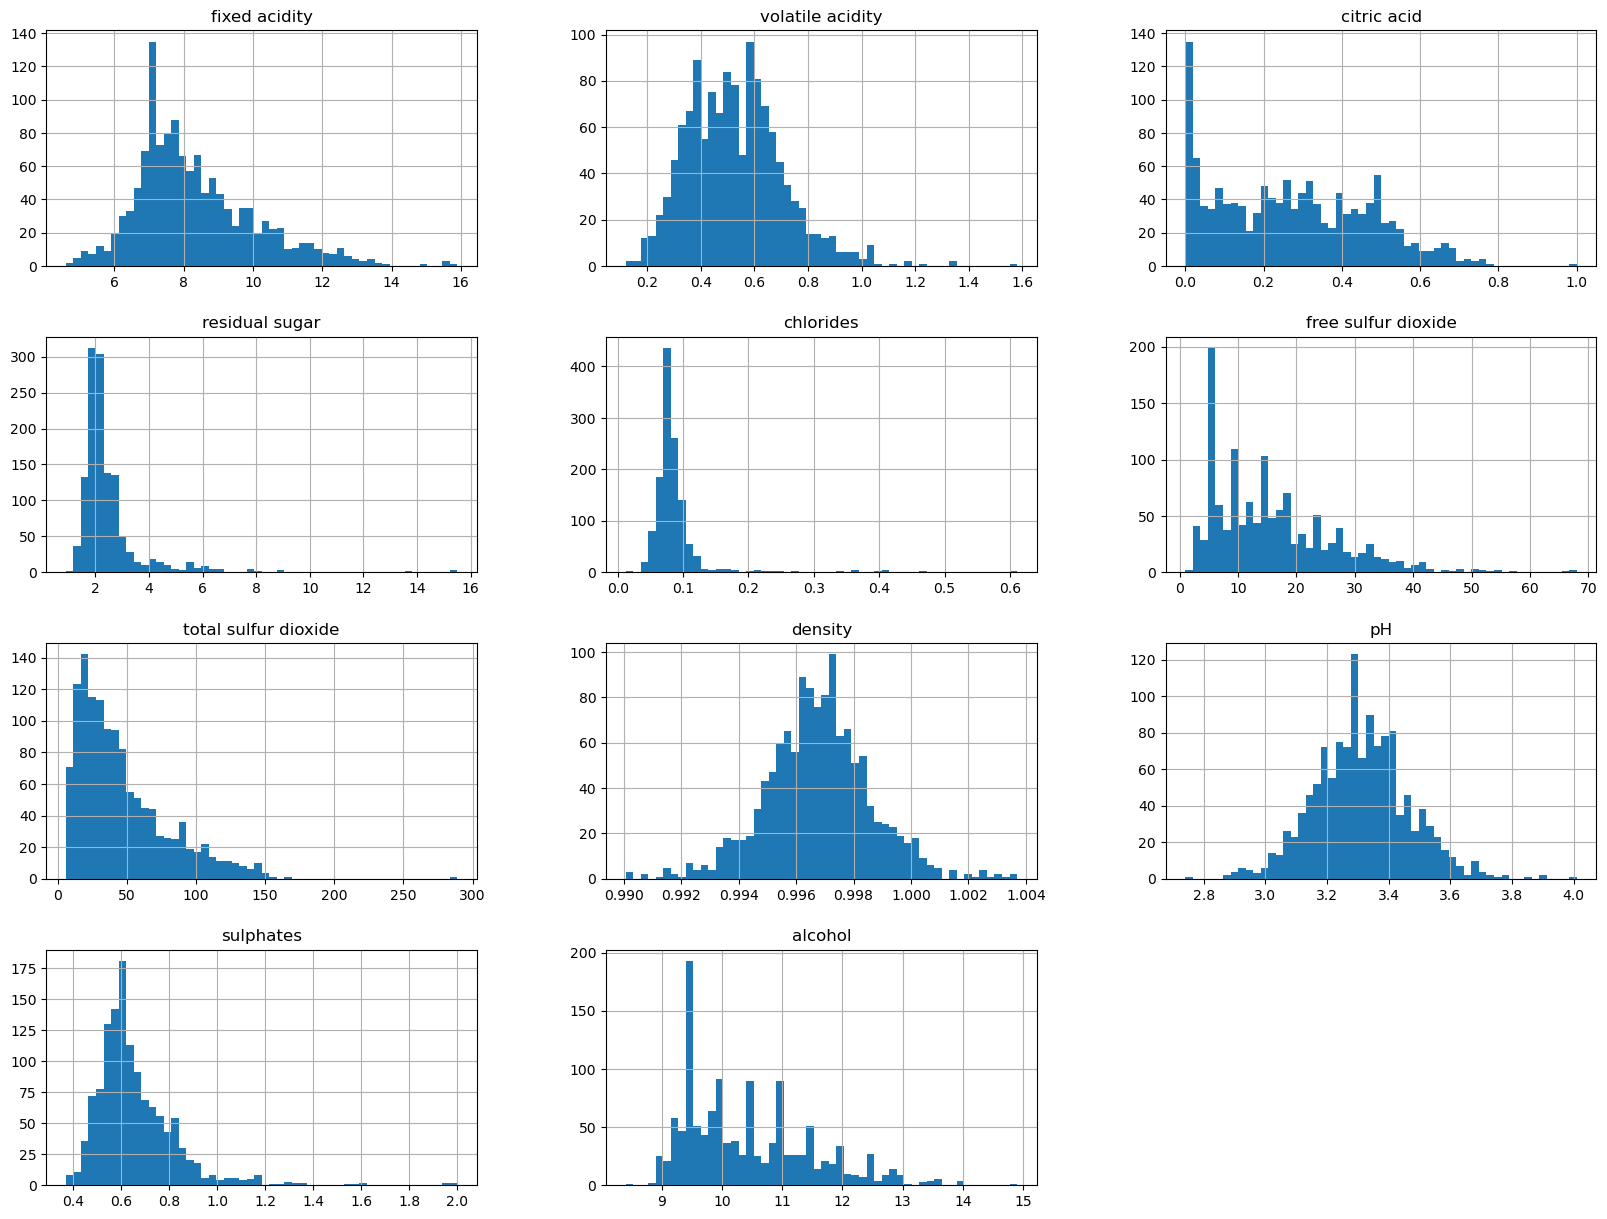

In [8]:
X_train.hist(bins=52,figsize=(20,15))

In [9]:
# create a correlation plot between all variables
corr_matrix = data_train.corr()
# output the correlation matrix as an nxn matrix
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.242533,0.669197,0.116167,0.088058,-0.155080,-0.111576,0.660577,-0.676197,0.173066,-0.058827,0.122488
volatile acidity,-0.242533,1.000000,-0.545491,0.007461,0.065063,-0.002211,0.083318,0.032228,0.217903,-0.266083,-0.210254,-0.378372
citric acid,0.669197,-0.545491,1.000000,0.152596,0.221817,-0.067874,0.034224,0.367675,-0.540161,0.315754,0.106708,0.216115
residual sugar,0.116167,0.007461,0.152596,1.000000,0.063500,0.167828,0.162079,0.377377,-0.076215,0.009121,0.042239,0.005425
chlorides,0.088058,0.065063,0.221817,0.063500,1.000000,0.012782,0.046437,0.185999,-0.268871,0.381678,-0.213184,-0.126541
free sulfur dioxide,-0.155080,-0.002211,-0.067874,0.167828,0.012782,1.000000,0.668166,-0.021194,0.066672,0.061942,-0.083883,-0.055860
total sulfur dioxide,-0.111576,0.083318,0.034224,0.162079,0.046437,0.668166,1.000000,0.075224,-0.070382,0.050056,-0.227074,-0.200067
density,0.660577,0.032228,0.367675,0.377377,0.185999,-0.021194,0.075224,1.000000,-0.332869,0.133472,-0.480249,-0.167091
pH,-0.676197,0.217903,-0.540161,-0.076215,-0.268871,0.066672,-0.070382,-0.332869,1.000000,-0.211560,0.217202,-0.045185
sulphates,0.173066,-0.266083,0.315754,0.009121,0.381678,0.061942,0.050056,0.133472,-0.211560,1.000000,0.097721,0.242596


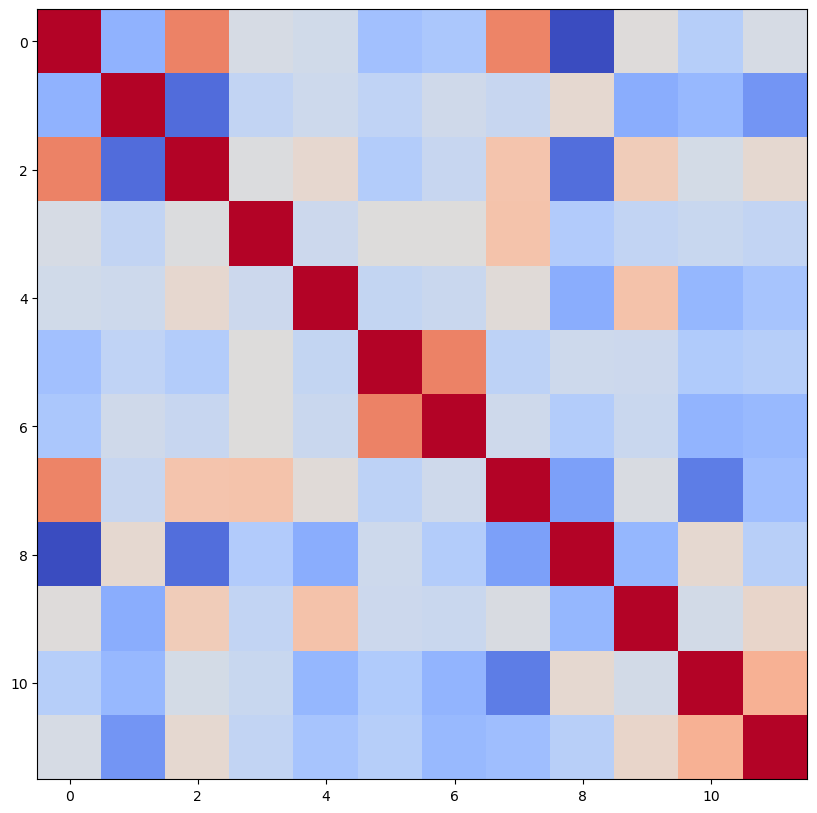

In [10]:
# output the correlation matrix as a heatmap    


plt.figure(figsize=(10, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.show()


In [11]:
corr_matrix[target].sort_values(ascending=False)


quality                 1.000000
alcohol                 0.472676
sulphates               0.242596
citric acid             0.216115
fixed acidity           0.122488
residual sugar          0.005425
pH                     -0.045185
free sulfur dioxide    -0.055860
chlorides              -0.126541
density                -0.167091
total sulfur dioxide   -0.200067
volatile acidity       -0.378372
Name: quality, dtype: float64

array([[<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='density', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='pH', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='quality', ylabel='fixed acidity'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='cit

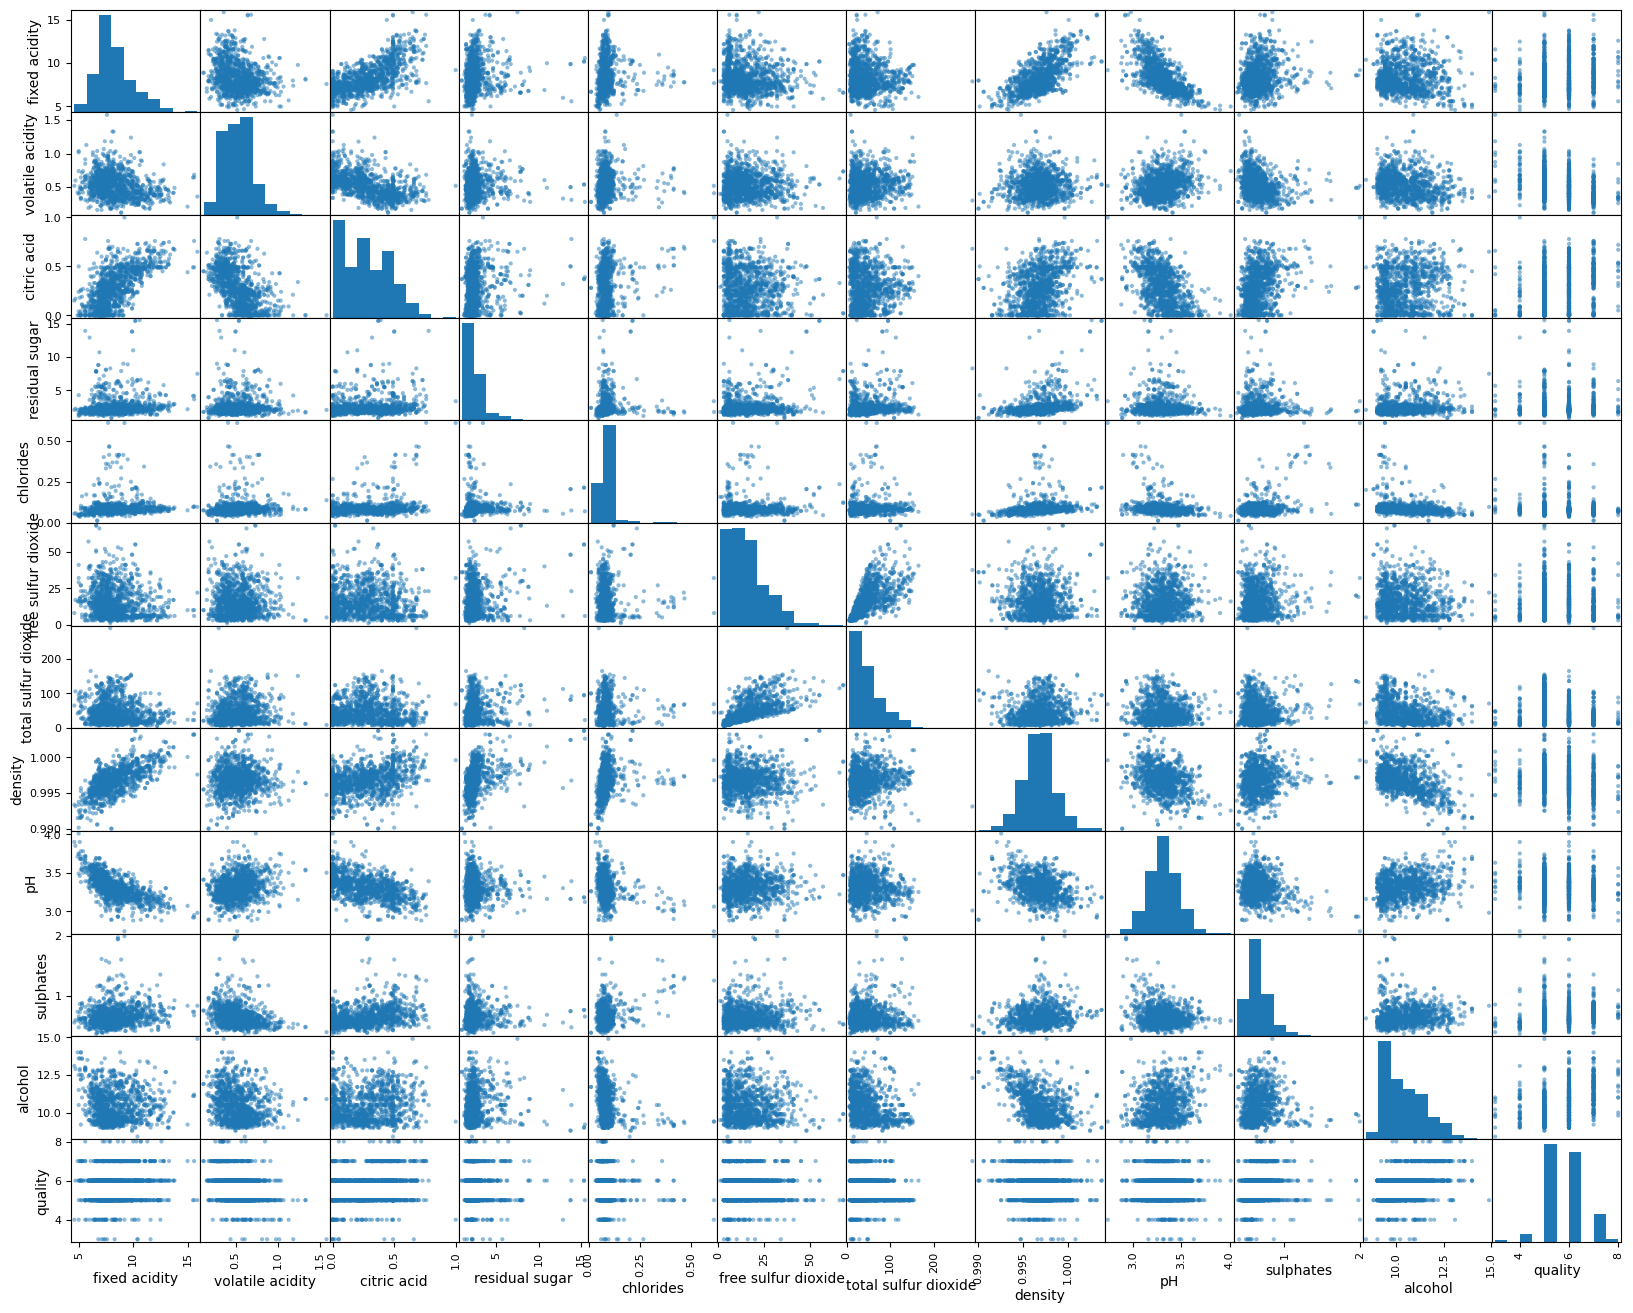

In [12]:

# create a scatter plot between all variables
from pandas.plotting import scatter_matrix

#attributes = [data_train.columns[0], data_train.columns[1], data_train.columns[2]]
scatter_matrix(data_train, figsize=(20, 16))


<AxesSubplot:>

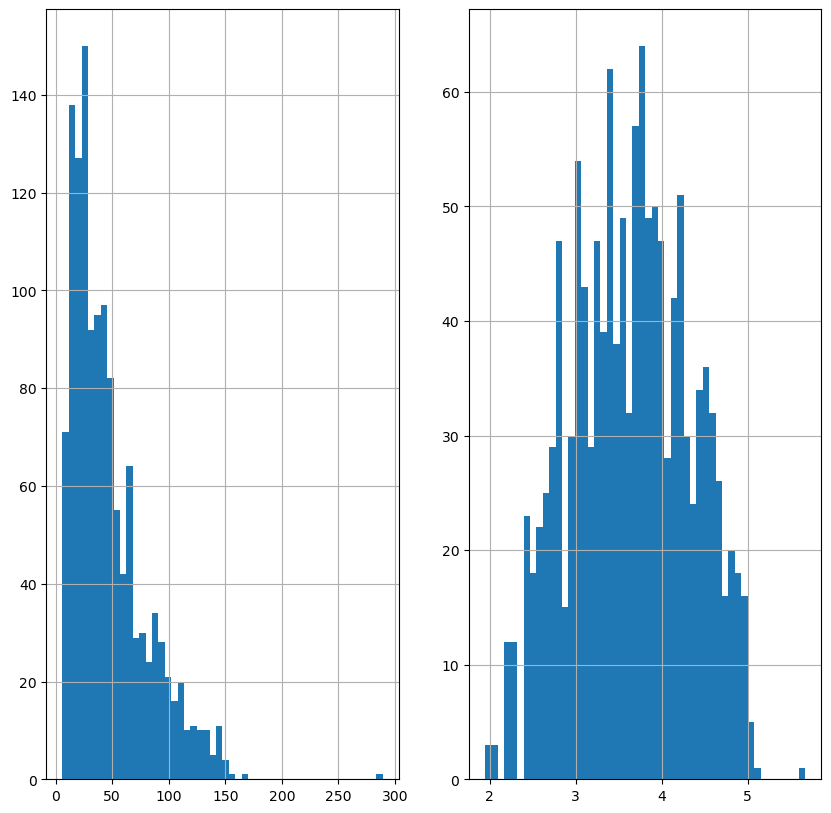

In [13]:


#log transform the skewed data
data_train["log total SO2"] = np.log1p(data_train["total sulfur dioxide"])

#plot the histogram of the log transformed data and the untransformed data side by side

fig, axes = plt.subplots(1,2, figsize=(10,10))
data_train["total sulfur dioxide"].hist(bins=50, ax=axes[0])
data_train["log total SO2"].hist(bins=50, ax=axes[1])


# Prepare the data

Going to have a simple pipeline here which adds a log transform of 1 variable, normalizes each column to 0 mean and 1 SD, and imputes missing values (if any)

In [14]:

from sklearn.base import BaseEstimator, TransformerMixin # import the base classes for creating a class

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): # create a class for adding new features
    def __init__(self, log_transform_total_SO2=True, col_names = "total sulfur dioxide"): # no *args or **kargs
        self.log_transform_total_SO2 = log_transform_total_SO2
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        if self.log_transform_total_SO2:
            col_names = "total sulfur dioxide"
            col_index = list(X_train.columns).index(col_names)
            log_total_SO2 = np.log1p(X.iloc[:,col_index])
            return np.c_[X, log_total_SO2]
        else:
            return np.c_[X]

attr_adder = CombinedAttributesAdder(log_transform_total_SO2=True) # create an instance of the class; an object


In [15]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

prep_pipeline = Pipeline([
        ('attr_adder', CombinedAttributesAdder()), # add the new features; note that we defined this class above
        ('imputer', SimpleImputer(strategy="median")), # impute the missing values with the median
        ('std_scaler', StandardScaler()),# scale the data set to have a mean of 0 and a standard deviation of 1 for each column
    ])

X_train_p = prep_pipeline.fit_transform(X_train) # fit and transform the data set to impute the missing values, add the new features, and scale the data set
X_train_p.mean(axis=0) # check that the mean is 0 for each column


array([-1.11109106e-16,  4.11798126e-16,  1.26386609e-16,  1.52775021e-17,
        3.74993234e-17, -7.63875107e-17, -7.56930788e-17,  2.55939827e-14,
       -1.35830883e-15,  4.15270285e-16,  4.72213702e-16, -7.29153511e-18])

# Short-list promising models

### Support functions

In [16]:
#consider writing a function to analyze the data by cross validation in a standard way, plot the results, and give standard outputs.

### Linear model

Assumes y is numerical value

Accuracy of linear model on training set: 0.35


Text(0, 0.5, 'Actual Quality')

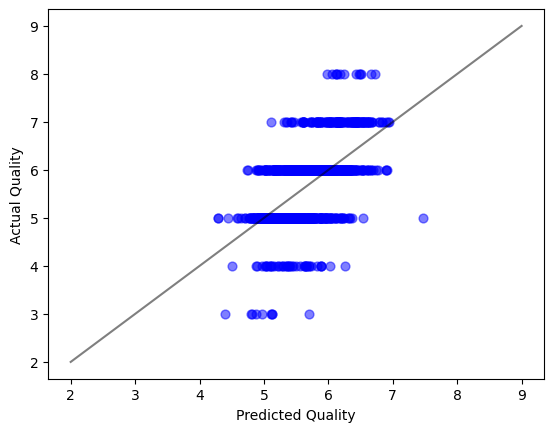

In [17]:
# quality is continuous variable
#linar model for red wine quality

import sklearn.linear_model as skl_lm

lin_model = skl_lm.LinearRegression()
lin_model.fit(X_train_p, y_train)

# accuracy
print('Accuracy of linear model on training set: {:.2f}'
        .format(lin_model.score(X_train_p, y_train)))

#plot predicted vs actual
plt.scatter(lin_model.predict(X_train_p), y_train,
                c='b', s=40, alpha=0.5)
# add a y=x line
plt.plot([2, 9], [2, 9], c='k', alpha=0.5)

#add axis labels
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')

### Random forest

6 classes

[0.6088993  0.61032864 0.67605634]
[[  0   1   6   2   0   0]
 [  1   0  28  13   1   0]
 [  0   5 429 111   6   0]
 [  0   1 158 314  33   0]
 [  0   0  16  78  63   0]
 [  0   0   0   5   6   2]]
[0.         0.         0.72222222 0.61030126 0.47368421 0.26666667]
0.6134417290267096


(0.0, 1.0)

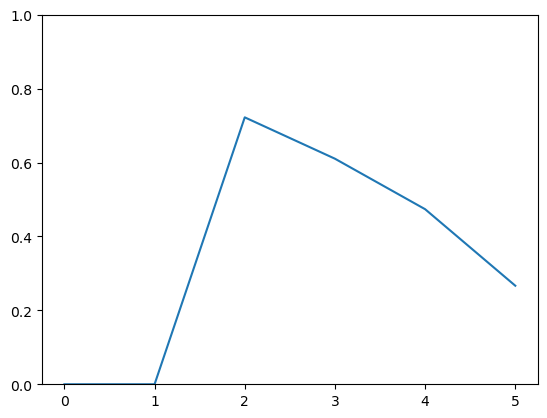

In [18]:
# random forest classifier
# y with 6 classes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


# create a random forest classifier
forest_clf = RandomForestClassifier(n_estimators=20, random_state=42)

# cross validation
forest_scores = cross_val_score(forest_clf, X_train_p, y_train, cv=3)
print(forest_scores)

forest_predict = cross_val_predict(forest_clf, X_train_p, y_train, cv=3)
print(confusion_matrix(y_train, forest_predict))

f1_scores=f1_score(y_train, forest_predict, average=None)
f1_score_weighted=f1_score(y_train, forest_predict, average='weighted')
print(f1_scores)
print(f1_score_weighted)
plt.plot(f1_scores)
# y axis from 0 to 1
plt.ylim(0,1)

Binary

[0.77283372 0.74882629 0.80751174]
[[472 131]
 [155 521]]
[0.76747967 0.78463855]


(0.0, 1.0)

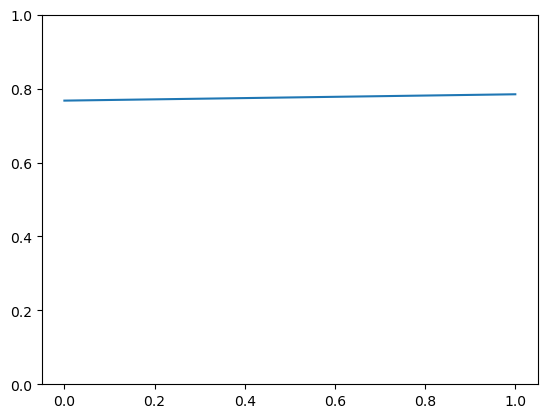

In [19]:
# Using binary values for quality
forest_scores = cross_val_score(forest_clf, X_train_p, y_train_binary, cv=3, scoring="accuracy")
print(forest_scores)

forest_predict = cross_val_predict(forest_clf, X_train_p, y_train_binary, cv=3)
print(confusion_matrix(y_train_binary, forest_predict))

f1_scores=f1_score(y_train_binary, forest_predict, average=None)
print(f1_scores)
plt.plot(f1_scores)
plt.ylim(0,1)

### Support Vector Machine

6 quality levels

[0.59250585 0.5915493  0.63380282]
[[  0   0   6   3   0   0]
 [  0   0  29  13   1   0]
 [  0   0 425 124   2   0]
 [  0   0 180 307  19   0]
 [  0   0  14 100  43   0]
 [  0   0   0   8   5   0]]
[0.         0.         0.70539419 0.57869934 0.37885463 0.        ]


(0.0, 1.0)

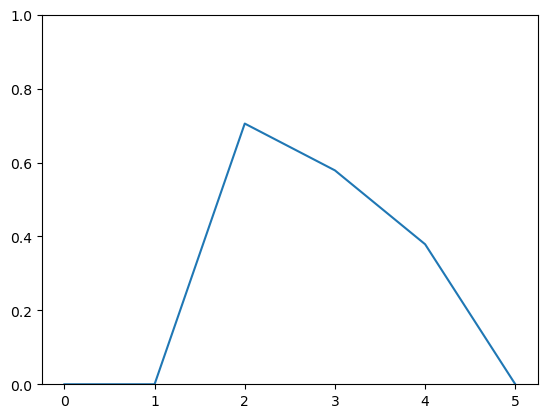

In [20]:
#support vector machine classifier
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)

svm_scores = cross_val_score(svm_clf, X_train_p, y_train, cv=3, scoring="accuracy")
print(svm_scores)

svm_predict = cross_val_predict(svm_clf, X_train_p, y_train, cv=3)
print(confusion_matrix(y_train, svm_predict))

f1_scores=f1_score(y_train, svm_predict, average=None)
print(f1_scores)
#plot f1 scores vs class labels
plt.plot(f1_scores)
# y axis from 0 to 1
plt.ylim(0,1)


[0.74004684 0.70422535 0.76995305]
[[455 148]
 [187 489]]
[0.73092369 0.7448591 ]


(0.0, 1.0)

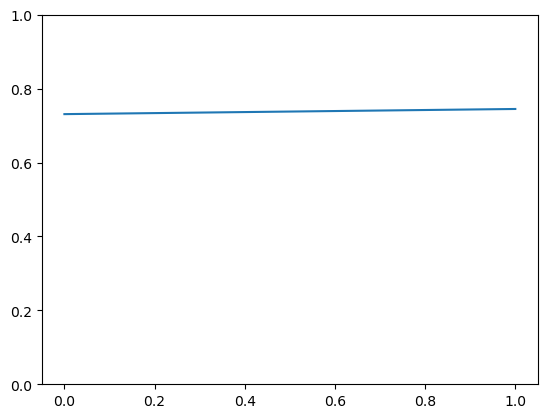

In [21]:
# Using binary values for quality
svm_scores = cross_val_score(svm_clf, X_train_p, y_train_binary, cv=3, scoring="accuracy")
print(svm_scores)

svm_predict = cross_val_predict(svm_clf, X_train_p, y_train_binary, cv=3)
print(confusion_matrix(y_train_binary, svm_predict))

f1_scores=f1_score(y_train_binary, svm_predict, average=None)
print(f1_scores)
#plot f1 scores vs class labels
plt.plot(f1_scores)
# y axis from 0 to 1
plt.ylim(0,1)

### K Neighbors

6 quality levels

[0.60421546 0.57746479 0.59859155]
[[  0   1   6   2   0   0]
 [  1   2  20  18   2   0]
 [  0   7 375 155  14   0]
 [  0   5 138 304  59   0]
 [  0   0  20  60  76   1]
 [  0   0   0   6   5   2]]
[0.         0.06896552 0.67567568 0.57849667 0.485623   0.25      ]
0.5844213768400534


(0.0, 1.0)

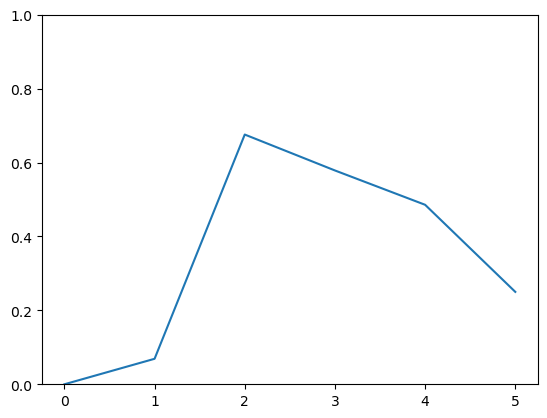

In [22]:
#K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn_scores = cross_val_score(knn_clf, X_train_p, y_train, cv=3, scoring="accuracy")
print(knn_scores)

knn_predict = cross_val_predict(knn_clf, X_train_p, y_train, cv=3)
print(confusion_matrix(y_train, knn_predict))

f1_scores=f1_score(y_train, knn_predict, average=None)
f1_score_weighted=f1_score(y_train, knn_predict, average='weighted')
print(f1_scores)
print(f1_score_weighted)
#plot f1 scores vs class labels
plt.plot(f1_scores)
# y axis from 0 to 1
plt.ylim(0,1)


[0.75644028 0.72535211 0.74178404]
[[413 190]
 [141 535]]
[0.7139153  0.76374019]
0.7402496405463481


(0.0, 1.0)

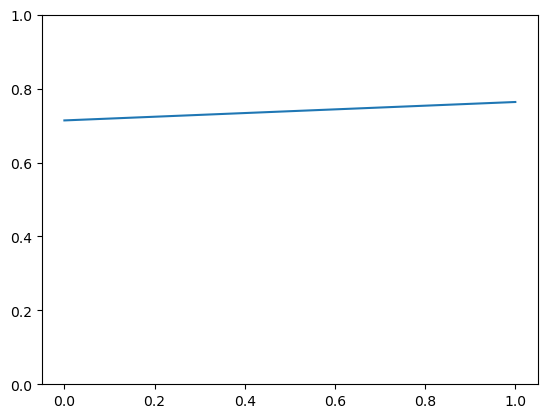

In [23]:
# Using binary values for quality
knn_scores = cross_val_score(knn_clf, X_train_p, y_train_binary, cv=3, scoring="accuracy")
print(knn_scores)

knn_predict = cross_val_predict(knn_clf, X_train_p, y_train_binary, cv=3)
print(confusion_matrix(y_train_binary, knn_predict))

f1_scores=f1_score(y_train_binary, knn_predict, average=None)
f1_score_weighted=f1_score(y_train_binary, knn_predict, average='weighted')
print(f1_scores)
print(f1_score_weighted)
#plot f1 scores vs class labels
plt.plot(f1_scores)
# y axis from 0 to 1
plt.ylim(0,1)

### Neural Network!  Very slow with some parameters

6 quality levels

In [24]:
#neural network
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, alpha=0.0001,  #max_iter should be increased but it is too slow
                        solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

mlp_scores = cross_val_score(mlp_clf, X_train_p, y_train, cv=3, scoring="accuracy")
print(mlp_scores)


Iteration 1, loss = 1.83379884
Iteration 2, loss = 1.79843128
Iteration 3, loss = 1.74703895
Iteration 4, loss = 1.69095543
Iteration 5, loss = 1.63542129
Iteration 6, loss = 1.58300191
Iteration 7, loss = 1.53465210
Iteration 8, loss = 1.49098174
Iteration 9, loss = 1.45071140
Iteration 10, loss = 1.41697002
Iteration 11, loss = 1.38572991
Iteration 12, loss = 1.35853372
Iteration 13, loss = 1.33439431
Iteration 14, loss = 1.31288598
Iteration 15, loss = 1.29484327
Iteration 16, loss = 1.27850584
Iteration 17, loss = 1.26409687
Iteration 18, loss = 1.25181860
Iteration 19, loss = 1.24052608
Iteration 20, loss = 1.23044813
Iteration 21, loss = 1.22130715
Iteration 22, loss = 1.21284202
Iteration 23, loss = 1.20487713
Iteration 24, loss = 1.19755815
Iteration 25, loss = 1.19032803
Iteration 26, loss = 1.18357177
Iteration 27, loss = 1.17726183
Iteration 28, loss = 1.17116006
Iteration 29, loss = 1.16556696
Iteration 30, loss = 1.15991260
Iteration 31, loss = 1.15449479
Iteration 32, los

c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.83390071
Iteration 2, loss = 1.79757031
Iteration 3, loss = 1.74640789
Iteration 4, loss = 1.68965468
Iteration 5, loss = 1.63335219
Iteration 6, loss = 1.57917856
Iteration 7, loss = 1.53023022
Iteration 8, loss = 1.48621186
Iteration 9, loss = 1.44564776
Iteration 10, loss = 1.41146056
Iteration 11, loss = 1.38004171
Iteration 12, loss = 1.35358351
Iteration 13, loss = 1.32943066
Iteration 14, loss = 1.30861040
Iteration 15, loss = 1.28977647
Iteration 16, loss = 1.27392151
Iteration 17, loss = 1.25956700
Iteration 18, loss = 1.24689021
Iteration 19, loss = 1.23569608
Iteration 20, loss = 1.22540351
Iteration 21, loss = 1.21602031
Iteration 22, loss = 1.20756643
Iteration 23, loss = 1.20006875
Iteration 24, loss = 1.19262574
Iteration 25, loss = 1.18561419
Iteration 26, loss = 1.17877324
Iteration 27, loss = 1.17251873
Iteration 28, loss = 1.16613665
Iteration 29, loss = 1.16036403
Iteration 30, loss = 1.15442570
Iteration 31, loss = 1.14884483
Iteration 32, los

c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.79817775
Iteration 3, loss = 1.74614148
Iteration 4, loss = 1.68899771
Iteration 5, loss = 1.63222577
Iteration 6, loss = 1.57830855
Iteration 7, loss = 1.52876346
Iteration 8, loss = 1.48509309
Iteration 9, loss = 1.44473628
Iteration 10, loss = 1.41039545
Iteration 11, loss = 1.37983913
Iteration 12, loss = 1.35226433
Iteration 13, loss = 1.32856433
Iteration 14, loss = 1.30805558
Iteration 15, loss = 1.28970103
Iteration 16, loss = 1.27392349
Iteration 17, loss = 1.26037061
Iteration 18, loss = 1.24852519
Iteration 19, loss = 1.23779412
Iteration 20, loss = 1.22851758
Iteration 21, loss = 1.22015200
Iteration 22, loss = 1.21264020
Iteration 23, loss = 1.20581062
Iteration 24, loss = 1.19922897
Iteration 25, loss = 1.19329907
Iteration 26, loss = 1.18734784
Iteration 27, loss = 1.18190552
Iteration 28, loss = 1.17650927
Iteration 29, loss = 1.17151459
Iteration 30, loss = 1.16648735
Iteration 31, loss = 1.16181741
Iteration 32, loss = 1.15719754
Iteration 33, lo

c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.83379884
Iteration 2, loss = 1.79843128
Iteration 3, loss = 1.74703895
Iteration 4, loss = 1.69095543
Iteration 5, loss = 1.63542129
Iteration 6, loss = 1.58300191
Iteration 7, loss = 1.53465210
Iteration 8, loss = 1.49098174
Iteration 9, loss = 1.45071140
Iteration 10, loss = 1.41697002
Iteration 11, loss = 1.38572991
Iteration 12, loss = 1.35853372
Iteration 13, loss = 1.33439431
Iteration 14, loss = 1.31288598
Iteration 15, loss = 1.29484327
Iteration 16, loss = 1.27850584
Iteration 17, loss = 1.26409687
Iteration 18, loss = 1.25181860
Iteration 19, loss = 1.24052608
Iteration 20, loss = 1.23044813
Iteration 21, loss = 1.22130715
Iteration 22, loss = 1.21284202
Iteration 23, loss = 1.20487713
Iteration 24, loss = 1.19755815
Iteration 25, loss = 1.19032803
Iteration 26, loss = 1.18357177
Iteration 27, loss = 1.17726183
Iteration 28, loss = 1.17116006
Iteration 29, loss = 1.16556696
Iteration 30, loss = 1.15991260
Iteration 31, loss = 1.15449479
Iteration 32, los

c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.79757031
Iteration 3, loss = 1.74640789
Iteration 4, loss = 1.68965468
Iteration 5, loss = 1.63335219
Iteration 6, loss = 1.57917856
Iteration 7, loss = 1.53023022
Iteration 8, loss = 1.48621186
Iteration 9, loss = 1.44564776
Iteration 10, loss = 1.41146056
Iteration 11, loss = 1.38004171
Iteration 12, loss = 1.35358351
Iteration 13, loss = 1.32943066
Iteration 14, loss = 1.30861040
Iteration 15, loss = 1.28977647
Iteration 16, loss = 1.27392151
Iteration 17, loss = 1.25956700
Iteration 18, loss = 1.24689021
Iteration 19, loss = 1.23569608
Iteration 20, loss = 1.22540351
Iteration 21, loss = 1.21602031
Iteration 22, loss = 1.20756643
Iteration 23, loss = 1.20006875
Iteration 24, loss = 1.19262574
Iteration 25, loss = 1.18561419
Iteration 26, loss = 1.17877324
Iteration 27, loss = 1.17251873
Iteration 28, loss = 1.16613665
Iteration 29, loss = 1.16036403
Iteration 30, loss = 1.15442570
Iteration 31, loss = 1.14884483
Iteration 32, loss = 1.14323655
Iteration 33, lo

c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.83439498
Iteration 2, loss = 1.79817775
Iteration 3, loss = 1.74614148
Iteration 4, loss = 1.68899771
Iteration 5, loss = 1.63222577
Iteration 6, loss = 1.57830855
Iteration 7, loss = 1.52876346
Iteration 8, loss = 1.48509309
Iteration 9, loss = 1.44473628
Iteration 10, loss = 1.41039545
Iteration 11, loss = 1.37983913
Iteration 12, loss = 1.35226433
Iteration 13, loss = 1.32856433
Iteration 14, loss = 1.30805558
Iteration 15, loss = 1.28970103
Iteration 16, loss = 1.27392349
Iteration 17, loss = 1.26037061
Iteration 18, loss = 1.24852519
Iteration 19, loss = 1.23779412
Iteration 20, loss = 1.22851758
Iteration 21, loss = 1.22015200
Iteration 22, loss = 1.21264020
Iteration 23, loss = 1.20581062
Iteration 24, loss = 1.19922897
Iteration 25, loss = 1.19329907
Iteration 26, loss = 1.18734784
Iteration 27, loss = 1.18190552
Iteration 28, loss = 1.17650927
Iteration 29, loss = 1.17151459
Iteration 30, loss = 1.16648735
Iteration 31, loss = 1.16181741
Iteration 32, los

c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.0, 1.0)

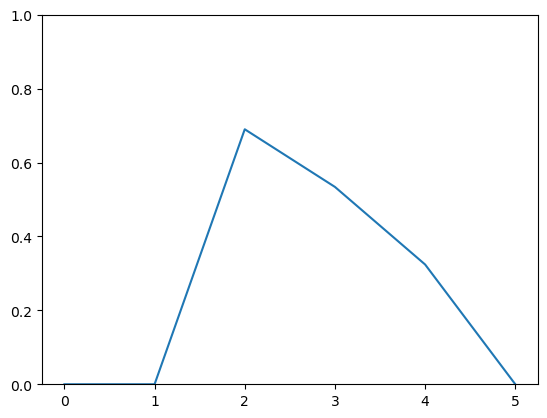

In [25]:

mlp_predict = cross_val_predict(mlp_clf, X_train_p, y_train, cv=3)
print(confusion_matrix(y_train, mlp_predict))

f1_scores=f1_score(y_train, mlp_predict, average=None)
print(f1_scores)
#plot f1 scores vs class labels
plt.plot(f1_scores)
# y axis from 0 to 1
plt.ylim(0,1)


[0.74004684 0.70422535 0.76995305]
[[455 148]
 [187 489]]
[0.73092369 0.7448591 ]


(0.0, 1.0)

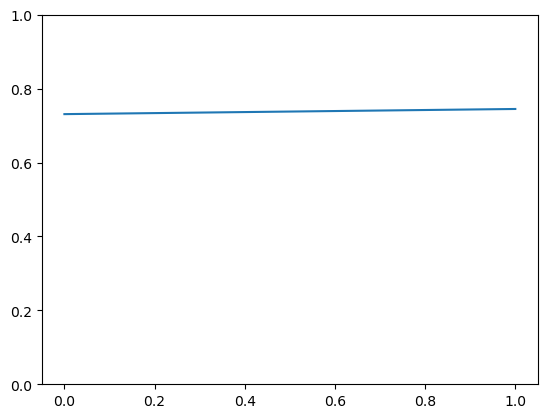

In [26]:
# Using binary values for quality
svm_scores = cross_val_score(svm_clf, X_train_p, y_train_binary, cv=3, scoring="accuracy")
print(svm_scores)

svm_predict = cross_val_predict(svm_clf, X_train_p, y_train_binary, cv=3)
print(confusion_matrix(y_train_binary, svm_predict))

f1_scores=f1_score(y_train_binary, svm_predict, average=None)
print(f1_scores)
#plot f1 scores vs class labels
plt.plot(f1_scores)
# y axis from 0 to 1
plt.ylim(0,1)

# Fine Tuning Final Model

### Let's say one model has been selected.  Then want to do a gridsearch on the hyperparameters.

In [31]:
# grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV


param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # 3x4=12 combinations
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, # 2x3=6 combinations
]

rfc=RandomForestClassifier(random_state=42)

#train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(rfc, param_grid, cv=5,
                            scoring='accuracy',
                            return_train_score=True)
grid_search.fit(X_train_p, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [33]:
rfc_clf = grid_search.best_estimator_
rfc_clf

RandomForestClassifier(max_features=2, n_estimators=30, random_state=42)

In [35]:
rfc_clf.fit(X_train_p, y_train)

RandomForestClassifier(max_features=2, n_estimators=30, random_state=42)

### 

In [41]:
#import classification_report
from sklearn.metrics import confusion_matrix, classification_report

X_test_p = prep_pipeline.fit_transform(X_test)

y_test_predictions = rfc_clf.predict(X_test_p)

print(confusion_matrix(y_test, y_test_predictions))
print(classification_report(y_test, y_test_predictions))

# f1_scores=f1_score(y_train, knn_predict, average=None)
# f1_score_weighted=f1_score(y_train, knn_predict, average='weighted')
# print(f1_scores)
# print(f1_score_weighted)
# #plot f1 scores vs class labels
# plt.plot(f1_scores)
# # y axis from 0 to 1
# plt.ylim(0,1)

[[ 0  0  1  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 99 31  0  0]
 [ 0  1 42 82  7  0]
 [ 0  0  2 21 19  0]
 [ 0  0  0  1  4  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.66      0.76      0.71       130
           6       0.59      0.62      0.61       132
           7       0.63      0.45      0.53        42
           8       0.00      0.00      0.00         5

    accuracy                           0.62       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.59      0.62      0.61       320



c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier